# Лабораторная работа №1<br> 
Генерация данных и анализ с использованием линейной регрессии<br>

---


# Задание 
Сгенерировать N облаков (классов) с M точками (объектами) в каждом. Построить классификатор используя scikit-learn который достигнет точности R лежащей в интервале (R1, R2).


---

# Вариант №14

Колличество классов (N) = 5;<br>
Колличество элементов в классе (M) = 546;<br>
Значение точности:<br>
*   Минимальное значение (R1) = 0.786
*   Максимальное значение (R2) = 0.798



---

Лабораторную работу выполнил студент группы 6133-010402D Мелешенко Иван. 



Перед началом работы подключим необходимые для работы библиотеки.

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.datasets import make_blobs

Инициализируем исходные данные для работы программы, согласно варианта задания.

In [178]:
valueClass = 5
valueElementsInClass = 546
minValueAccuracy = 0.786
maxValueAccuracy = 0.798

Произведем генерацию данных.

In [179]:
np.random.seed(336)         
centers = [[1, -2], [1, 2], [3, 3], [4, -2], [2, -0.5]]
X, y = make_blobs(valueClass*valueElementsInClass, centers=centers, random_state=58) 
data, labels = shuffle(X, y)    # Случайная перестановка элементов массивов

Пострим график.

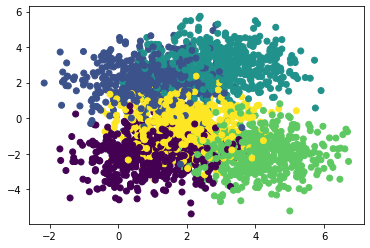

In [180]:
plt.scatter(X[:, 0], X[:, 1], c=y)

Разделим выборку пополам: тренировочную и тестовую.

In [181]:
# Половина данных тренировочные, а другая для тестирования
test_size = int(len(data) * 0.5)
Xtrain = data[:test_size]
Ytrain = labels[:test_size]
Xtest = data[test_size:]
Ytest = labels[test_size:]

Обучим модель.

In [182]:
clf = LogisticRegression(max_iter=10000)
clf.fit(Xtrain, Ytrain)   # Обучение
predictions = clf.predict(Xtest) 

Определим значение точности и матрицу ошибок.

Допустимый отрезок [0.786, 0.798]
Точность = 0.7956043956043956

Matrix_Errors:

[[209   2   0  17  44]
 [  0 221  30   0  25]
 [  0  35 245   0   6]
 [ 15   0   0 242  21]
 [ 43  11   7  23 169]]




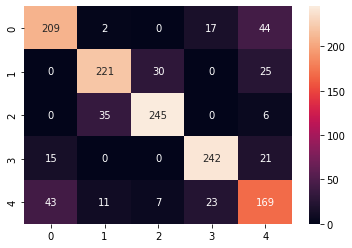

In [189]:
accuracy = accuracy_score(Ytest, predictions)

if accuracy < maxValueAccuracy:
  print(f"Допустимый отрезок [{minValueAccuracy}, {maxValueAccuracy}]")
  print(f"Точность = {accuracy}\n")
  m_e = confusion_matrix(Ytest, predictions)
  print("Matrix_Errors:\n")
  print(сm)
  print('\n')
  sn.heatmap(m_e, annot=True, fmt='d') # annot - отображение colorbar, fmt - формат значений
else:
  print(f"Точность перешагнула допустимый отрезок [{minValueAccuracy}, {maxValueAccuracy}]")
  print(f"Точность = {accuracy}")